In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
weather=pd.read_csv(r'C:\Users\Vinh Hoa Tu\Downloads/london_weather123.csv')
print(weather.head())
print(weather.info())
sunshine=weather[['date', 'sunshine']]
print(sunshine)

       date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0  19790101          2.0       7.0              52.0       2.3       -4.1   
1  19790102          6.0       1.7              27.0       1.6       -2.6   
2  19790103          5.0       0.0              13.0       1.3       -2.8   
3  19790104          8.0       0.0              13.0      -0.3       -2.6   
4  19790105          6.0       2.0              29.0       5.6       -0.8   

   min_temp  precipitation  pressure  snow_depth  
0      -7.5            0.4  101900.0         9.0  
1      -7.5            0.0  102530.0         8.0  
2      -7.2            0.0  102050.0         4.0  
3      -6.5            0.0  100840.0         2.0  
4      -1.4            0.0  102250.0         1.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341

In [50]:
sunshine['date']=sunshine['date'].astype(str)
sd = sunshine[sunshine['date'].str.endswith(('01','15'))] # only keep date 01 and 15
sd= sd.reset_index() #reset the indice of dataframe
sd=sd.drop('index',axis=1)

C:\Users\Vinh Hoa Tu\AppData\Local\Temp\ipykernel_15600\461779359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sunshine['date']=sunshine['date'].astype(str)


In [4]:
sd

,date,sunshine
0,19790101,7.0
1,19790115,0.0
2,19790201,0.0
3,19790215,0.0
4,19790301,6.4
...,...,...
1003,20201015,2.7
1004,20201101,0.7
1005,20201115,0.7
1006,20201201,1.0


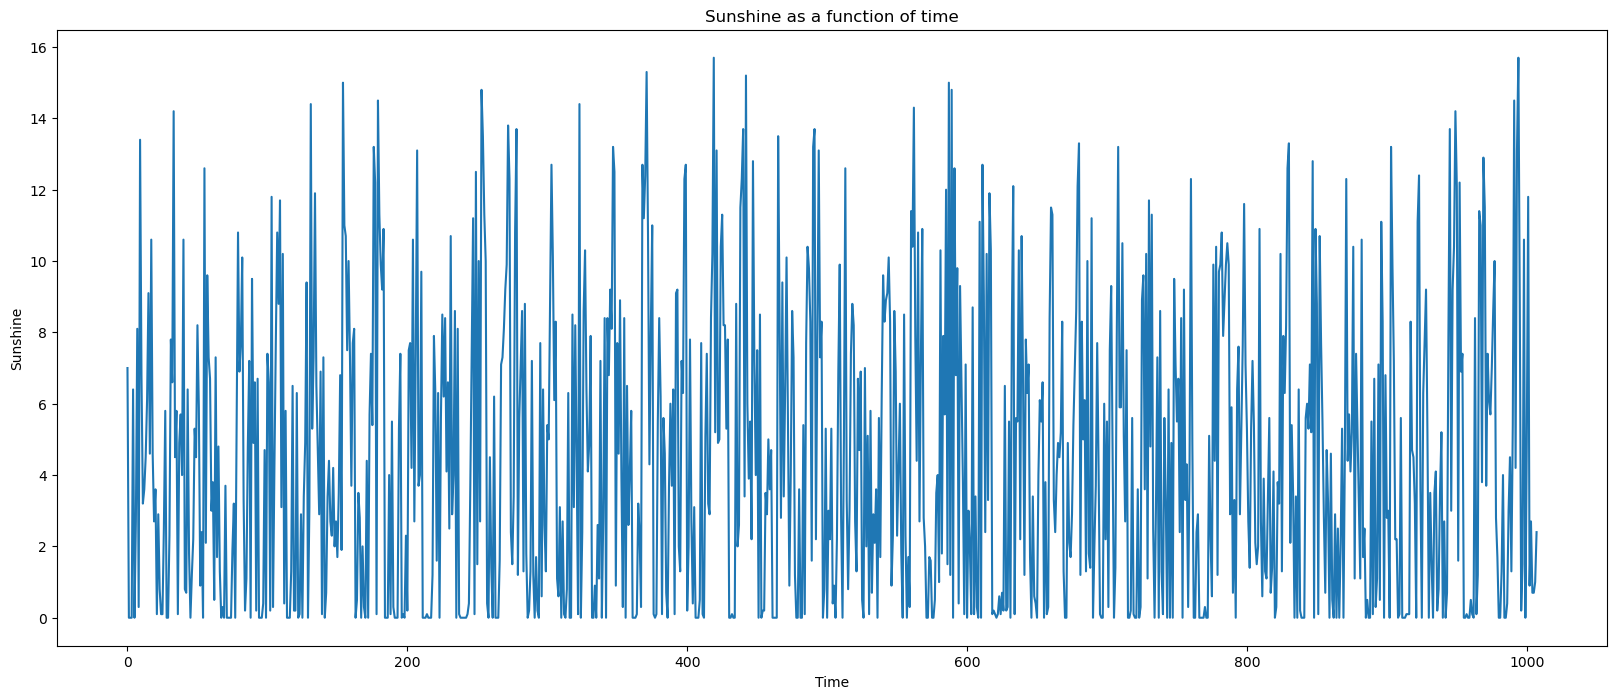

In [87]:
#show sd
plt.figure(figsize=(20,8))
plt.plot(sd['sunshine'])
plt.title('Sunshine as a function of time')
plt.xlabel('Time')
plt.ylabel('Sunshine')
plt.show()

In [51]:
mean=sd['sunshine'].mean()
variance=sd['sunshine'].var()
print(f'Moyenne : {mean}, Variance :{variance}')

Moyenne : 4.454265873015872, Variance :16.95326877531872


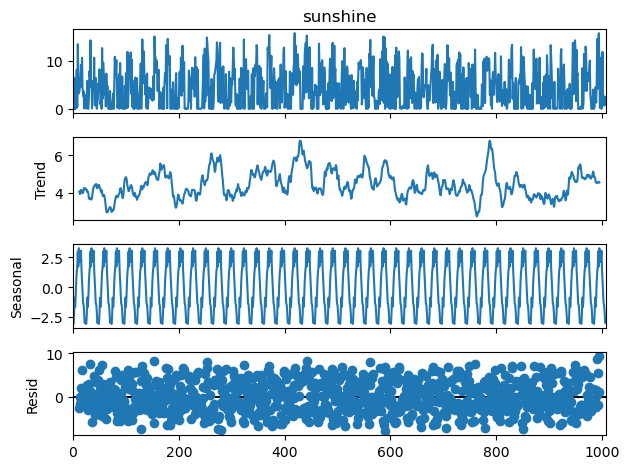

In [52]:
#decompose the serie into trend, seasonal, residual and stationary serie
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(sd['sunshine'], model='additive',period=24)
result.plot()
plt.show()

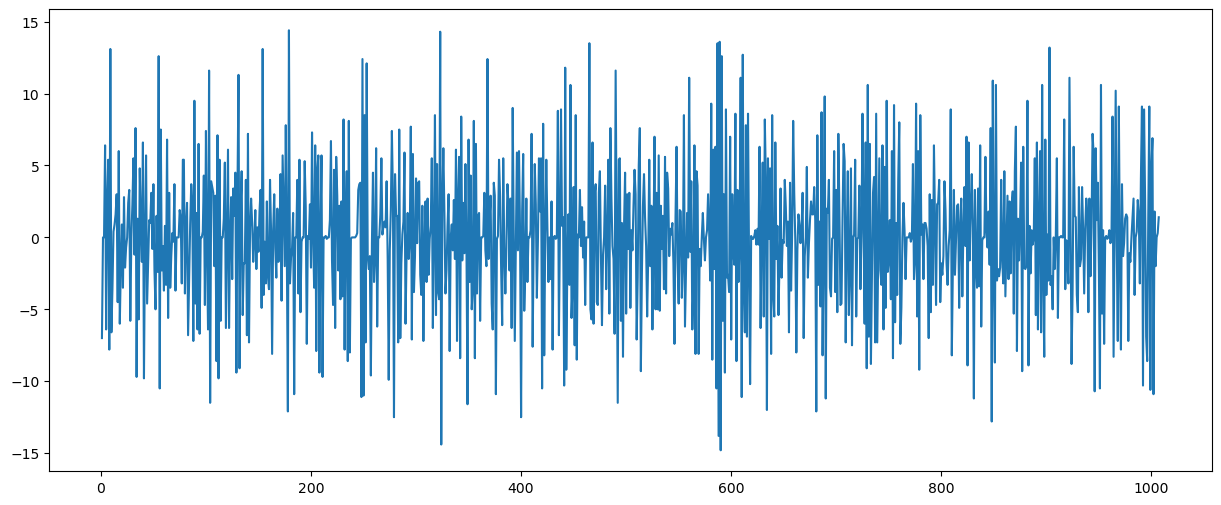

In [53]:
plt.figure(figsize=(15,6))
plt.plot(sd['sunshine'].diff()) # remove trend and season of sunshine by differencing 
stationnarized=sd['sunshine'].diff()

In [93]:
#Augmented Dickey-Fuller Test to test the stationarity of (Xt)
from statsmodels.tsa.stattools import adfuller
adfuller(sd['sunshine'])


result = adfuller(sd['sunshine'])

# Extracting and printing the results
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

# Interpret the results
if p_value <= 0.05:
    print("The null hypothesis (non-stationarity) can be rejected. The time series appears to be stationary.")
else:
    print("The null hypothesis cannot be rejected. The time series")

ADF Statistic: -7.157973427955217
p-value: 3.019711565769702e-10
Critical Values:
   1%: -3.4370062675076807
   5%: -2.8644787205542492
   10%: -2.568334722615888
The null hypothesis (non-stationarity) can be rejected. The time series appears to be stationary.


In [54]:
stationnarized=stationnarized.dropna()

In [55]:
stationnarized

1      -7.0
2       0.0
3       0.0
4       6.4
5      -6.4
       ... 
1003    1.8
1004   -2.0
1005    0.0
1006    0.3
1007    1.4
Name: sunshine, Length: 1007, dtype: float64

Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

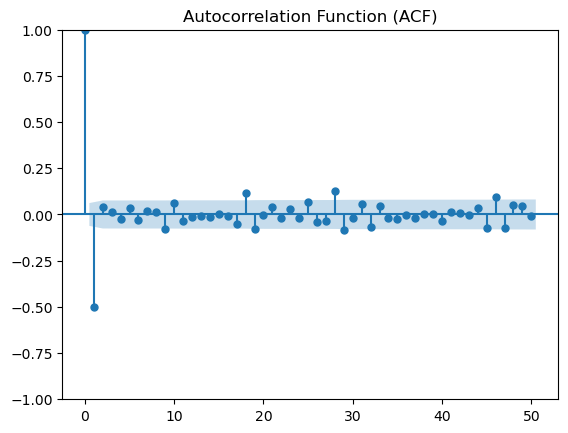

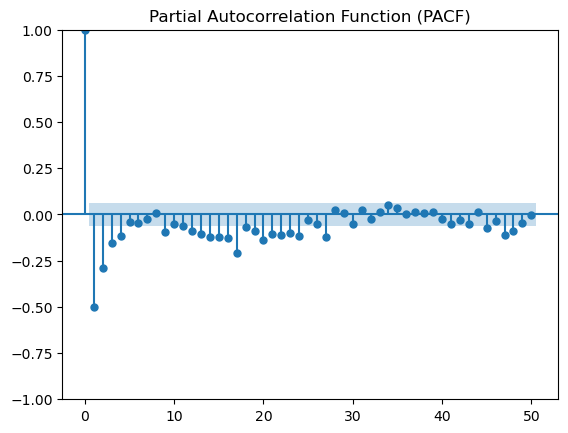

In [12]:
#ACF and PACF

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# PLot ACF
plot_acf(stationnarized, lags=50)
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plot_pacf(stationnarized, lags=(50))
plt.title('Partial Autocorrelation Function (PACF)')



In [73]:
# train AR(27) model, lag=27 in summary AutoReg(27)

from statsmodels.tsa.ar_model import AutoReg
train_data = stationnarized[:len(stationnarized)-10]
test_data = stationnarized[len(stationnarized)-10:]
ar_model = AutoReg(train_data, lags=27).fit()
print(ar_model.summary())


                            AutoReg Model Results                             
Dep. Variable:               sunshine   No. Observations:                  997
Model:                    AutoReg(27)   Log Likelihood               -2643.467
Method:               Conditional MLE   S.D. of innovations              3.692
Date:                Wed, 13 Dec 2023   AIC                           5344.934
Time:                        22:59:01   BIC                           5486.376
Sample:                            27   HQIC                          5398.771
                                  997                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0064      0.119      0.054      0.957      -0.226       0.239
sunshine.L1     -0.9087      0.032    -28.530      0.000      -0.971      -0.846
sunshine.L2     -0.7916      0.043    -18.43

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
# prediction
predict= ar_model.predict(start= len(train_data)+1, end=len(stationnarized),dynamic=False)

C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Text(0.5, 1.0, 'Serie with the last 10% of value highlighted in red')

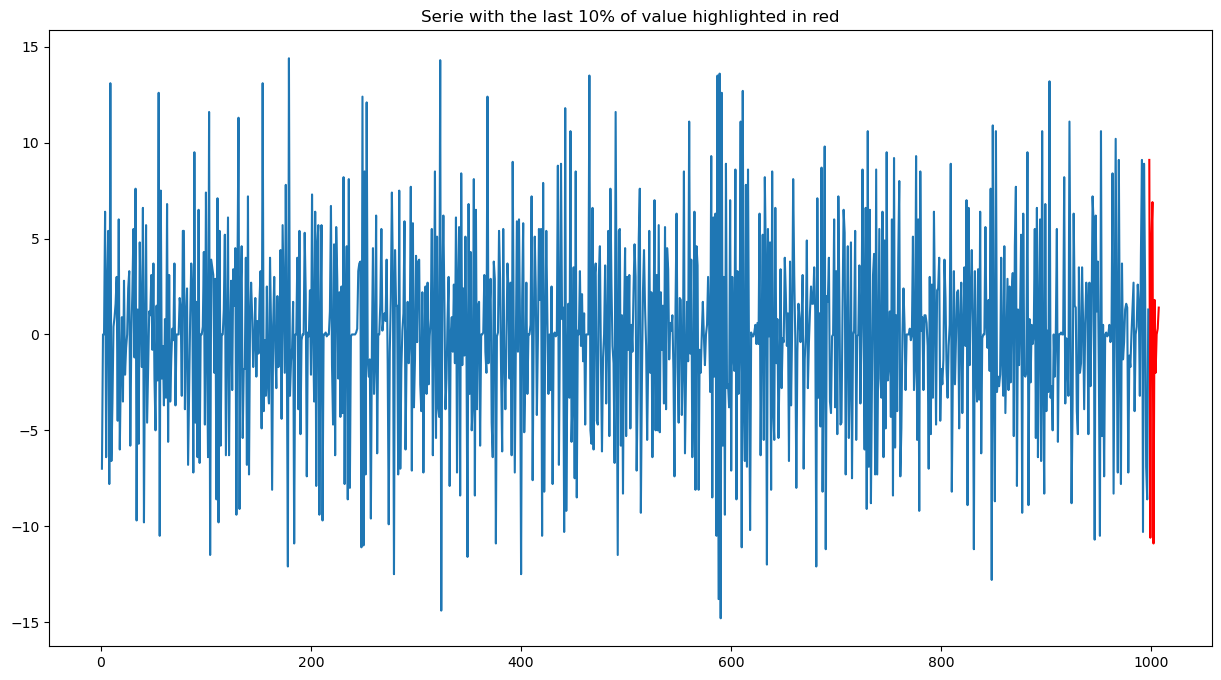

In [75]:
# ploting the serie with the last 10% of value highlighted in red
plt.figure(figsize=(15,8))
plt.plot(test_data, color='red')
plt.plot(stationnarized[:len(stationnarized)-10])
plt.title('Serie with the last 10% of value highlighted in red')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


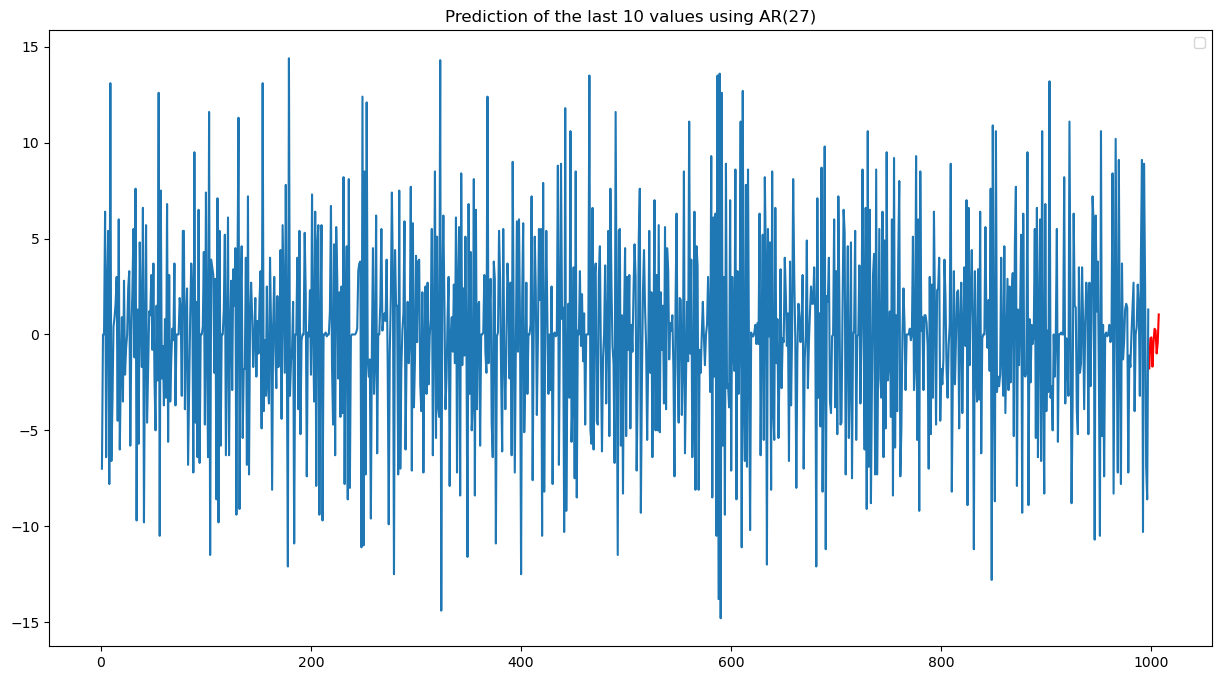

In [76]:
#prediction with AR model
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(stationnarized[:len(stationnarized)-10])
plt.title('Prediction of the last 10 values using AR(27)')
plt.legend()

Text(0.5, 1.0, 'Prediction of the last 10 values using AR(27)')

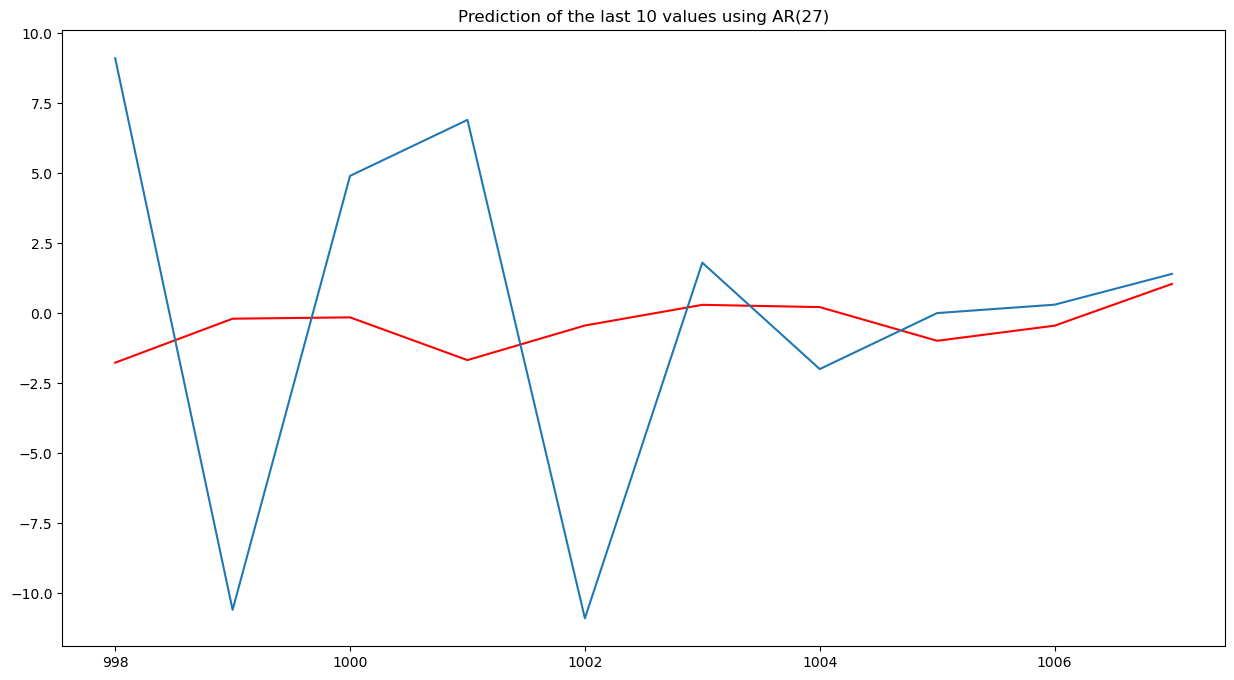

In [77]:
# ploting test_data and prediction using AR(27) modele
plt.figure(figsize=(15,8))
plt.plot(predict, color='red')
plt.plot(test_data)
plt.title('Prediction of the last 10 values using AR(27)')

Text(0.5, 1.0, 'ACF of standardized residuals')

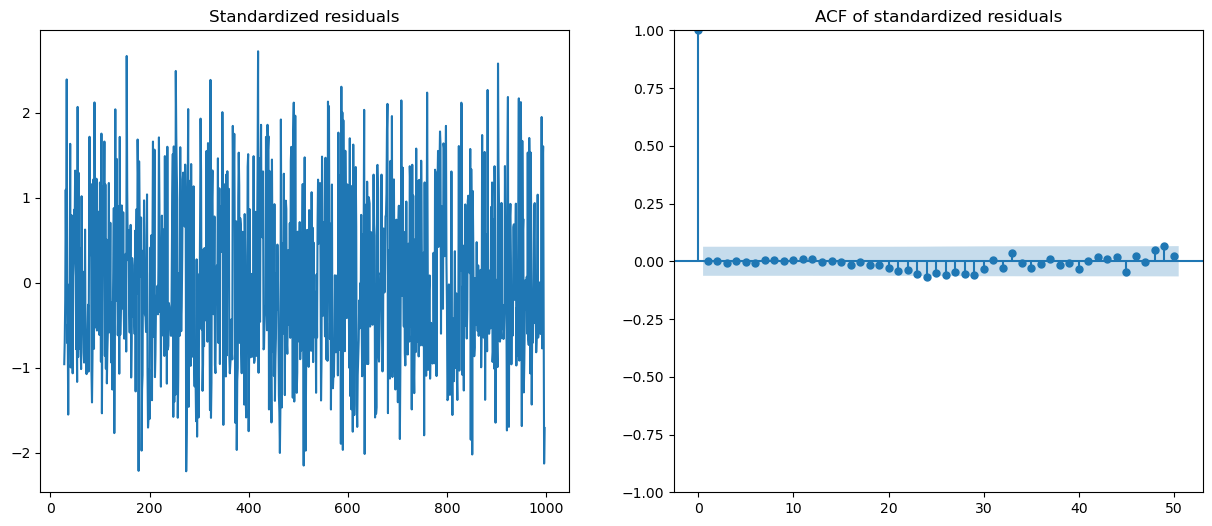

In [22]:
# residuals of model AR after training
residuals = ar_model.resid

# standadized residuals
std_residuals = residuals / np.std(residuals)


#plot
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Standardized residuals
axs[0].plot(std_residuals)
axs[0].set_title('Standardized residuals')

# Plot 2: ACF of standardized residuals
plot_acf(std_residuals, lags=50, ax=axs[1])  # Pass the ax object to plot_acf
axs[1].set_title('ACF of standardized residuals')

In [23]:
#Using Ljung-box to determine the confidence of the non-hypothesis
import statsmodels.api as sm

df= sm.stats.acorr_ljungbox(residuals, lags=20)
df1=pd.DataFrame(df,columns=['lb_pvalue'])

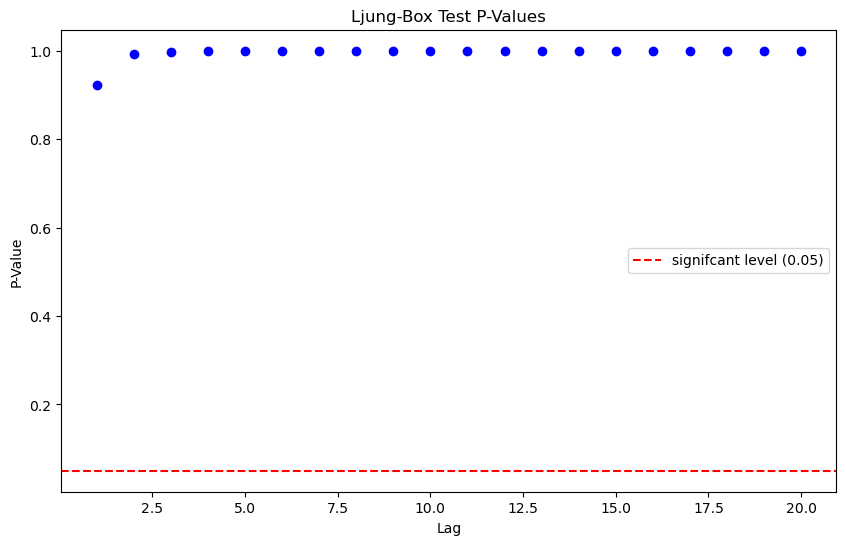

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,21), df1, marker='o', linestyle='', color='b')
plt.axhline(y=0.05, color='r', linestyle='--', label='signifcant level (0.05)')
plt.title('Ljung-Box Test P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.legend()
plt.show()

In [80]:
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm


# Extract the relevant column from your dataset (replace 'column_name' with the actual column name)
data = stationnarized

# Create a table to store the results
results_table = pd.DataFrame(columns=['p', 'q', 'AIC'])

# Choose values for p and q
p_values = range(0, 27)  # Adjust the range based on your needs
q_values = range(0, 3)  # Adjust the range based on your needs

# Iteration over different combinations of p and q
for p in tqdm(p_values, desc='Progress'):
    for q in q_values:
        order = (p, 0, q)  # Use (p, d, q) with d=0 for stationary time series
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=order)
            results = model.fit(disp=False)

            # Save the results in the table
            results_table = results_table.append({'p': p, 'q': q, 'AIC': results.aic}, ignore_index=True)
        except Exception as e:
            print(f"ARIMA({p}, 0, {q}) model did not converge. Error: {e}")
            continue

# Display the results table
print(results_table)

Progress: 100%|██████████| 27/27 [00:00<00:00, 599.96it/s]

ARIMA(0, 0, 0) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(0, 0, 1) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(0, 0, 2) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(1, 0, 0) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(1, 0, 1) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(1, 0, 2) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(2, 0, 0) model did not converge. Error: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).
ARIMA(2, 0, 1) model did not converge. Error: Pandas data cast to numpy dtype of object. Check in

In [83]:
data = stationnarized

# Set the range of p and q values
p_values = range(0, 6)  # Adjust the range based on your needs
q_values = range(0, 3)  # Adjust the range based on your needs

# Create an empty matrix to store BIC values
bic_matrix = np.zeros((len(p_values), len(q_values)))

# Iteration over different combinations of p and q
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        order = (p, 0, q)  # Use (p, d, q) with d=0 for stationary time series
        try:
            # Fit the ARIMA model
            model = ARIMA(data, order=order)
            results = model.fit(disp=False)
            
            # Store the BIC value in the matrix
            bic_matrix[i, j] = results.bic
        except Exception as e:
            print(f"ARIMA({p}, 0, {q}) model did not converge. Error: {e}")

# Convert the matrix to a DataFrame for better visualization
bic_df = pd.DataFrame(bic_matrix, index=p_values, columns=q_values)

# Display the BIC matrix
print(bic_df)

ARIMA(0, 0, 0) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(0, 0, 1) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(0, 0, 2) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(1, 0, 0) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(1, 0, 1) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(1, 0, 2) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(2, 0, 0) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(2, 0, 1) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(2, 0, 2) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'
ARIMA(3, 0, 0) model did not converge. Error: ARIMA.fit() got an unexpected keyword argument 'disp'


C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored 

In [85]:

from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm  # Pour afficher une barre de progression

# Données à utiliser (remplacez cela par vos données)
data = stationnarized

# Créer un tableau pour stocker les résultats
results_table = pd.DataFrame(columns=['p', 'q', 'AIC'])

# Choix des valeurs possibles pour p et q
p_values = range(0, 27)  # Modifiez la plage selon vos besoins
q_values = range(0, 4)  # Modifiez la plage selon vos besoins

# Itération sur différentes combinaisons de p et q
for p in tqdm(p_values, desc='Progress'):
    for q in q_values:
        order = (p, 0, q)  # Utilisez (p, d, q) avec d=0 car nous considérons des séries temporelles stationnaires
        try:
            # Ajuster le modèle ARIMA
            model = ARIMA(data, order=order)
            results = model.fit(disp=False)
            
            # Enregistrer les résultats dans le tableau
            results_table = results_table.append({'p': p, 'q': q, 'AIC': results.aic}, ignore_index=True)
        except:
            continue

# Afficher le tableau des résultats
print(results_table)

Progress:   0%|          | 0/27 [00:00<?, ?it/s]C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Vinh Hoa Tu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An uns

Empty DataFrame
Columns: [p, q, AIC]
Index: []
